# Data Engineering 
## day 2 

### 가상환경(AWS) 접속 

.sql 파일 DATAS 파일에 업로드, 저장

sudo mysql -u multi -p 

source /home/ubuntu/sql-examples/datas/sakila-schema.sql;

source /home/ubuntu/sql-examples/datas/sakila-data.sql;


### Query
### 실수 데이터 처리
#### 1) CEIL : 실수 데이터를 올림하여 정수로 나타내기 
```sql
SELECT CEIL(12.345);

# 국가별 언어 사용 비율을 소수 첫번째 자리에서 올림하여 정수로 나타내기
SELECT CountryCode, Language, Percentage, CEIL(Percentage)
FROM countrylanguage;
```

#### 2) ROUND : 실수 데이터를 반올림 할 때 사용한다.
```sql 
SELECT ROUND(12.345, 2);  
# 소수점 셋째 자리에서 반올림하여 둘째 자리까지 표시

SELECT CountryCode, Language, Percentage, ROUND(Percentage, 0)
FROM countrylanguage;
```

### 3) TRUNCATE : 실수 데이터를 버림 할 때 사용한다.
```sql
SELECT TRUNCATE(12.345, 2);

SELECT CountryCode, Language, Percentage, TRUNCATE(Percentage, 0)
FROM countrylanguage;
```

## 조건문
#### 1) IF(조건, 참 expr, 거짓 expr)
```sql
# 도시의 인구가 100만이 넘으면 'Big City', 안 넘으면 'Small City'
SELECT name, Population, IF(Population >= 1000000, 'Big City', 'Small City')
FROM city;

# 도시의 인구가 100만이 넘으면 'Big City'. 50만이 넘으면 'Medium, City', 안넘으면 'Small City'
SELECT name,
	Population,
    IF(Population >= 1000000, 
    'Big City', 
    IF(Population >=500000, 'Medium City', 'Small City')
    )
FROM city;
```
#### 2) NULL
NULL : 데이터가 없음을 의미
```sql
SELECT *
FROM country
WHERE IndepYear IS NULL; #IS NOT NULL
```
- NULL 값을 처리 -> NULL 대신에 다른 값으로 채우겠다.

#### 3) IFNULL(컬럼명, 채울 값)
```sql
SELECT IndepYear, IFNULL(IndepYear,0), Name
FROM country;
```
#### 4) CASE
```sql
CASE
	WHEN(조건1) THEN 출력1,
    WHEN(조건2) THEN 출력2,
END
```

- AS (ALIAS) 를 붙여주는 것이 좋음

```sql
# 나라 별로 인구가 10억 이상, 1억 이상, 1억 이하인 컬럼을 추가하여 표현
SELECT name,
	population,
    CASE 
		WHEN population >=1000000000 THEN '10억 이상'
        WHEN population >= 100000000 THEN '1억 이상'
        WHEN population < 100000000 THEN '1억 미만'
    END AS 'result'
FROM country;
```

- FIELD : 행과 열이 접하는 한 칸 

![스크린샷 2023-05-26 오전 10.32.13.png](<attachment:스크린샷 2023-05-26 오전 10.32.13.png>)
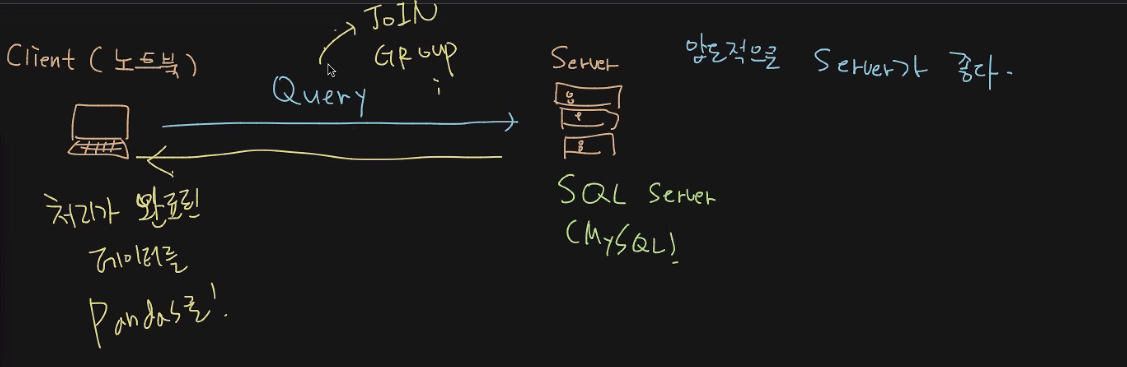

## GROUP BY 추가 설명
- GROUP BY 에는 카테고리가 될 수 없는 컬럼이 들어오면 안된다.

- 카테고리컬 컬럼을 만들어서 group by (group by에 함부로 컬럼을 넣으면 안됨)

  -> 카테고리컬 컬럼을 조건문으로 생성 가능

- GROUP BY의 목적은 단순해야함(계획을 잘 세우고 쓰기)

## JOIN

관계성을 가지고 엮음

PK - FK

* PK

대푯값(key)

색인(INDEX) 으로 설정 - 데이터를 정렬해줌, 정수로 놓아야 좋음

유일성

* FK

PK 를 참조

중복 가능(참조 무결성 제약조건 위반) 


* UK(UNIQUE Key)

유일, 단 참조 불가 (FK가 될 수 없음)

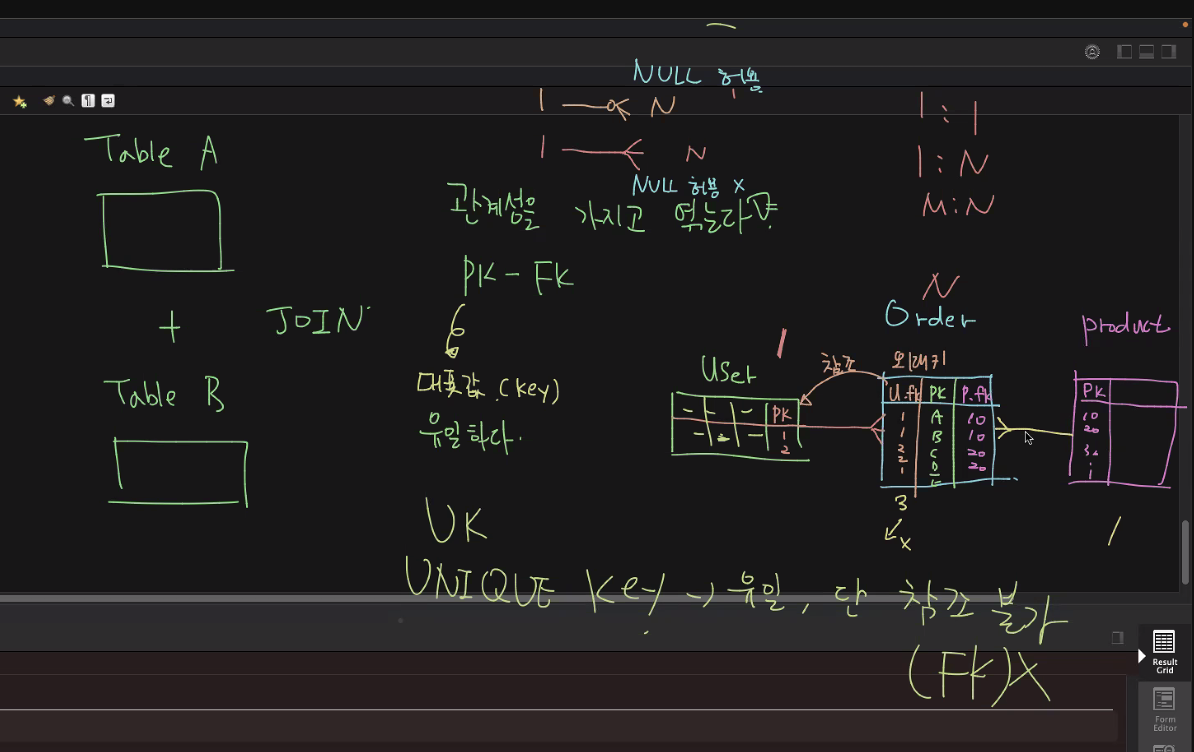

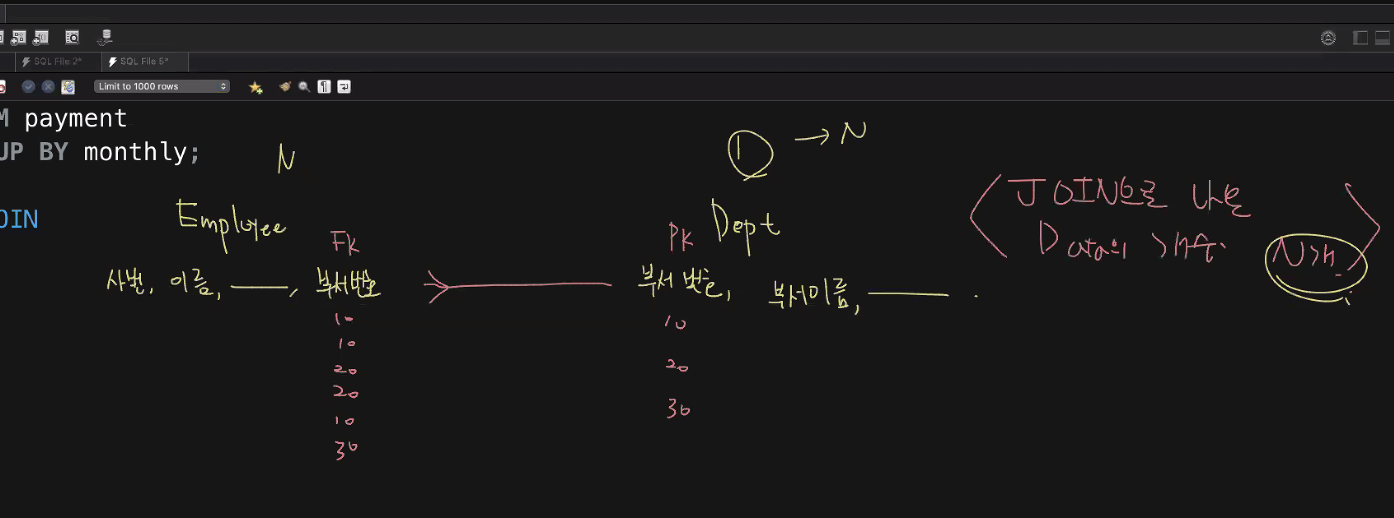
JOIN으로 나온 Data의 개수는 N개
-> 집합 레벨의 변화

JOIN 의 유형 

ON: 공통되는 부분 넣기

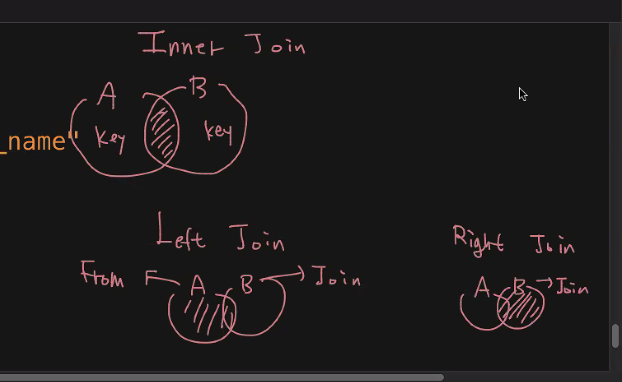

#### 1) INNER JOIN 
: 두 테이블 사이에 공통된 값이 없는 row에는 출력 안함
- 메인이 되는 table을 FROM절에 넣음
- 함수는 그냥 JOIN 

#### 2) LEFT JOIN 
: FROM절에 오는 테이블의 모든 정보를 표시

#### 3) RIGHT JOIN 
: 뒤에 오는 테이블의 모든 정보를 표시 

#### 4) FULL JOIN
: 모든 행을 포함하고, 조인 조건에 따라 일치하는 행을 선택하여 결과를 반환
- 두 테이블 간에 일치하는 행과 일치하지 않는 행을 모두 포함

#### 5) CROSS JOIN
: 첫 번째 테이블의 각 행을 두 번째 테이블의 모든 행과 결합하여 가능한 모든 조합을 생성
- 조인 조건이 필요하지 않음 


FULL OUTER JOIN
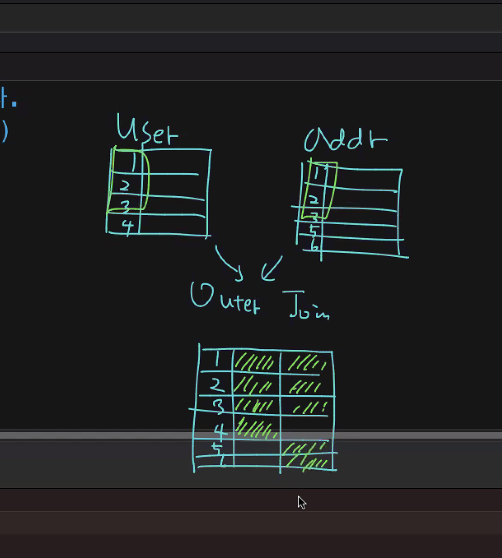

## UNION

SELECT 문의 결과 데이터를 하나로 합쳐서 출력

- 주의: 컬럼의 개수, 타입, 순서 모두 일치해야함

UNION 은 자동으로 distinct가 적용됨 (중복 데이터는 제거됨)

UNION ALL은 중복을 허용


#### UNION 으로 FULL Outer JOIN 구현
```sql
SELECT id, user.name, addr.addr
FROM user
LEFT JOIN addr ON user.user_id = addr.user_id

UNION

SELECT id, user.name, addr.addr
FROM user
RIGHT JOIN addr ON user.user_id = addr.user_id;
```